### 1) Através do método dos quadrados mínimos, ajuste, aos dados da tabela abaixo, as curvas:

In [1]:
lista_x = [  1,   2,   3,   4,   5,   6,   7,   8] # x
lista_y = [0.5, 0.6, 0.9, 0.8, 1.2, 1.5, 1.7, 2.0] # f(x)

#### (a) uma reta

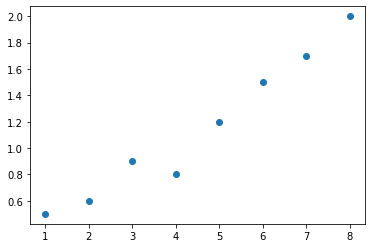

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x=lista_x, y=lista_y)

A função de ajuste será do tipo:

$$
\varphi(x) = a_0 + a_1x
$$

tal que $a_0, a_1$ minimize

$$
\sum_{i=1}^{8} (\varphi(x_i) - y_i)^2
$$

Definindo então a função a ser minimizada
$$
F(a_0, a_1) = \sum_{i=1}^{8} (a_0 + a_1 x_i - y_i)^2
$$

Ou seja,
$$
\nabla F = 0 \\
\frac{\partial F}{\partial a_0} = 0 \quad \frac{\partial F}{\partial a_1} = 0
$$

Primeira equação: $\frac{\partial F}{\partial a_0} = 0$
$$
\frac{\partial (\sum_{i=1}^{8} (a_0 + a_1 x_i - y_i)^2)}{\partial a_0} = 0 \\
\sum_{i=1}^{8} 2(a_0 + a_1 x_i - y_i) = 0 \\
\sum_{i=1}^{8} (a_0 + a_1 x_i - y_i) = 0 \\
\sum_{i=1}^{8} a_0 + \sum_{i=1}^{8} a_1 x_i - \sum_{i=1}^{8} y_i = 0 \\
8 a_0 + a_1 \sum_{i=1}^{8} x_i = \sum_{i=1}^{8} y_i
$$

Segunda equação: $\frac{\partial F}{\partial a_1} = 0$
$$
\frac{\partial (\sum_{i=1}^{8} (a_0 + a_1 x_i - y_i)^2)}{\partial a_1} = 0 \\
\sum_{i=1}^{8} 2x_i (a_0 + a_1 x_i - y_i) = 0 \\
\sum_{i=1}^{8} (a_0 x_i + a_1 x_i^2 - y_i x_i) = 0 \\
\sum_{i=1}^{8} a_0 x_i + \sum_{i=1}^{8} a_1 x_i^2 - \sum_{i=1}^{8} y_i x_i = 0 \\
a_0 \sum_{i=1}^{8} x_i + a_1 \sum_{i=1}^{8} x_i^2 = \sum_{i=1}^{8} y_i x_i
$$

Então temos o sistema
$$
\begin{cases}
\begin{align}
8 a_0 + a_1 \sum_{i=1}^{8} x_i &= \sum_{i=1}^{8} y_i \\
a_0 \sum_{i=1}^{8} x_i + a_1 \sum_{i=1}^{8} x_i^2 &= \sum_{i=1}^{8} y_i x_i
\end{align}
\end{cases}
$$

In [3]:
print(f'{lista_x} Soma x -> {sum(lista_x)}')
print(f'{lista_y} Soma y -> {sum(lista_y)}')
print(f'{[x**2 for x in lista_x]} Soma x^2 -> {sum([x**2 for x in lista_x])}')
print(f'{[x*y for x, y in zip(lista_x, lista_y)]} Soma x*y -> {sum([x*y for x, y in zip(lista_x, lista_y)])}')

[1, 2, 3, 4, 5, 6, 7, 8] Soma x -> 36
[0.5, 0.6, 0.9, 0.8, 1.2, 1.5, 1.7, 2.0] Soma y -> 9.2
[1, 4, 9, 16, 25, 36, 49, 64] Soma x^2 -> 204
[0.5, 1.2, 2.7, 3.2, 6.0, 9.0, 11.9, 16.0] Soma x*y -> 50.5


Substituindo os somatórios
$$
\begin{cases}
\begin{align}
8 a_0 + 36 a_1 &= 9.2 \\
36 a_0 + 204 a_1 &= 50.5
\end{align}
\end{cases}
$$

In [4]:
import numpy as np

np.linalg.solve([[8, 36], [36, 204]], [9.2, 50.5])

array([0.175     , 0.21666667])

E o sistema tem a solução
$$
a_0 = 0.175 \quad a_1 = 0.21666667
$$

Logo, a reta será dada por
$$
\varphi(x) = a_0 + a_1x \\
\varphi(x) = 0.175 + 0.21666667x
$$

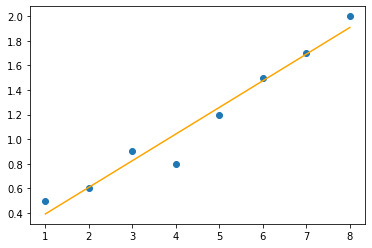

In [5]:
fig, ax = plt.subplots()
ax.scatter(x=lista_x, y=lista_y)

reta = [0.175 + 0.21666667*x for x in lista_x]
ax.plot(lista_x, reta, c='orange')

#### (b) uma parábola

Esse caso será resolvido através da resolução do Sistema Normal matricial
$$
\phi^T \phi a = \phi^T y
$$

Onde $\phi$ é a matriz de Vandermonde dos valores de $x$ e $a$ é a matriz coluna dos coeficientes da função $\varphi(x)$ a ser obtida.

$$
\varphi(x) = a_0 + a_1 x + a_2 x^2
$$

$$
\phi = \begin{bmatrix}
1 & 1 & 1 \\
1 & 2 & 4 \\
1 & 3 & 9 \\
1 & 4 & 16 \\
1 & 5 & 25 \\
1 & 6 & 36 \\
1 & 7 & 49 \\
1 & 8 & 64
\end{bmatrix} \quad
y = \begin{bmatrix}
0.5 \\
0.6 \\
0.9 \\
0.8 \\
1.2 \\
1.5 \\
1.7 \\
2.0
\end{bmatrix} \quad
a = \begin{bmatrix}
a_0 \\
a_1 \\
a_2
\end{bmatrix}
$$

In [6]:
import sympy as sp

phi = sp.Matrix([
    [1, 1, 1],
    [1, 2, 4],
    [1, 3, 9],
    [1, 4, 16],
    [1, 5, 25],
    [1, 6, 36],
    [1, 7, 49],
    [1, 8, 64],
])

y = sp.Matrix([
    [0.5],
    [0.6],
    [0.9],
    [0.8],
    [1.2],
    [1.5],
    [1.7],
    [2.0],
])

$$
A = \phi^T \cdot \phi
$$

In [7]:
A = phi.T * phi
A

Matrix([
[  8,   36,  204],
[ 36,  204, 1296],
[204, 1296, 8772]])

$$
B = \phi^T \cdot y
$$

In [8]:
B = phi.T * y
B

Matrix([
[  9.2],
[ 50.5],
[319.1]])

$$
Aa = B \\
\begin{bmatrix}
8 & 36 & 204 \\
36 & 204 & 1296 \\
204 & 1296 & 8772 \\
\end{bmatrix} \,
\begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
\end{bmatrix} =
\begin{bmatrix}
9.2 \\
50.5 \\
319.1 \\
\end{bmatrix}
$$

In [9]:
A.gauss_jordan_solve(B)[0]

Matrix([
[ 0.407142857142859],
[0.0773809523809515],
[0.0154761904761906]])

Então
$$
a_0 = 0.40714286 \quad a_1 = 0.07738095 \quad a_2 = 0.01547619
$$
são os coeficientes da parábola. A função será:
$$
\varphi(x) = 0.40714286 + 0.07738095x + 0.01547619x^2
$$

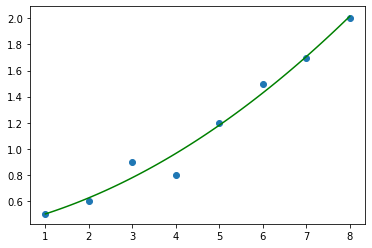

In [10]:
fig, ax = plt.subplots()
ax.scatter(x=lista_x, y=lista_y)

parabola = [0.40714286 + 0.07738095*x + 0.01547619*x**2 for x in lista_x]
parabola_curva = [0.40714286 + 0.07738095*x + 0.01547619*x**2 for x in np.linspace(1, 8, 100)]

ax.plot(np.linspace(1, 8, 100), parabola_curva, c='green')

#### Qual das curvas melhor se ajusta aos dados no sentido dos quadrados mínimos? Justifique.

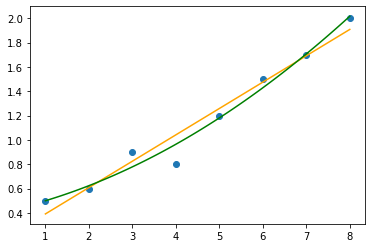

In [11]:
fig, ax = plt.subplots()
ax.scatter(x=lista_x, y=lista_y)

ax.plot(lista_x, reta, c='orange')
ax.plot(np.linspace(1, 8, 100), parabola_curva, c='green')

In [12]:
media = sum(lista_y)/len(lista_y)
diferencas_media = sum([(media - y)**2 for y in lista_y]) # soma dos quadradis das diferenças entre os pontos y e a média dos pontos y
diferencas_reta = sum([(phi - y)**2 for phi, y in zip(reta, lista_y)]) # soma dos quadrados das diferenças entre os pontos y reais e os pontos estimados pela reta
diferencas_parabola = sum([(phi - y)**2 for phi, y in zip(parabola, lista_y)]) # soma dos quadrados das diferenças entre os pontos y reais e os pontos estimados pela parábola

In [13]:
print(diferencas_media, diferencas_reta, diferencas_parabola)

2.06 0.0883333333333356 0.04809523809524319


In [14]:
print(1 - diferencas_reta/diferencas_media, 1 - diferencas_parabola/diferencas_media) # R^2

0.9571197411003225 0.976652797041144


As distâncias dos pontos da parábola para os pontos reais é menor do que as distâncias dos pontos da reta para os pontos reais. Portanto, o ajuste pela parábola é melhor do que o ajuste pela reta.

In [15]:
def equacoes_normais(lista_x, lista_y, grau):
    vandermonde = [[x**p for p in range(grau+1)] for x in lista_x] # cria a matriz de Vandermonde
    
    phi = sp.Matrix(vandermonde)
    y = sp.Matrix(lista_y) # matriz coluna dos valores de f(x)
    
    A = phi.T * phi
    B = phi.T * y
    
    return A.gauss_jordan_solve(B)[0] # resolve Ax = B e retorna x

---

### 2) A tabela mostra as alturas e pesos de uma amostra de nove pessoas entre as idades de 25 e 29 anos:

In [16]:
alturas = [183, 173, 168, 188, 158, 163, 193, 163, 178] # cm
pesos   = [79.0,  69,  70,  81,  61,  63,  79,  71,  73] # kg

#### a) através do diagrama de dispersão dos dados, observe que parece existir uma relação linear entre a altura e o peso.

(55.0, 85.0)

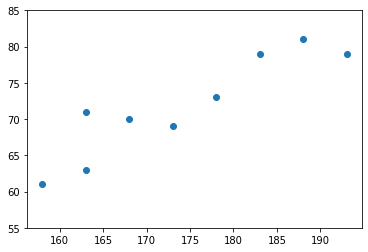

In [17]:
fig, ax = plt.subplots()

ax.scatter(x=alturas, y=pesos)
ax.set_ylim(bottom=55, top=85)

#### (b) ajuste uma reta que descreva o comportamento do peso em função da altura.

In [18]:
equacoes_normais(lista_x=alturas, lista_y=pesos, grau=1)

Matrix([
[-20.0780373831776],
[0.527570093457944]])

Então
$$
\varphi(x) = -20.07803738 + 0.52757009x
$$

(55.0, 85.0)

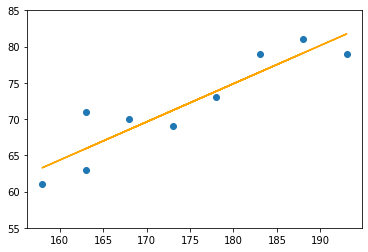

In [19]:
reta_2b = [-20.07803738 + 0.52757009*x for x in alturas]

fig, ax = plt.subplots()

ax.scatter(x=alturas, y=pesos)
ax.plot(alturas, reta_2b, c='orange')

ax.set_ylim(bottom=55, top=85)

In [20]:
sum([(phi - y)**2 for phi, y in zip(reta_2b, pesos)])

64.6518691588818

#### c) estime o peso de uma pessoa com 175 cm de altura e estime a altura de uma pessoa com 80 kg.

Peso de uma pessoa com 175 cm de altura:

In [21]:
(lambda x: -20.07803738 + 0.52757009*x)(175)

72.24672837

Aproximadamente 72.25 kg segundo o modelo.

Altura de uma pessoa com 80 kg:

$$
80 = −20.07803738 + 0.52757009x \\
x = \frac{80 + 20.07803738}{0.52757009}
$$

In [22]:
(80 + 20.07803738)/0.52757009

189.69619255708753

Aproximadamente 189.70 cm segundo o modelo.

#### d) ajuste a reta que descreve o comportamento da altura em função do peso.

(154.0, 195.0)

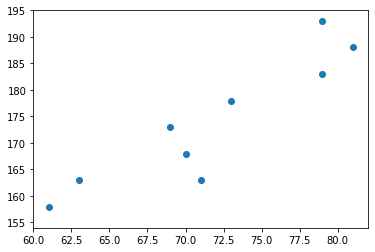

In [23]:
fig, ax = plt.subplots()

ax.scatter(x=pesos, y=alturas)
ax.set_ylim(bottom=154, top=195)

In [24]:
equacoes_normais(lista_x=pesos, lista_y=alturas, grau=1)

Matrix([
[60.2949438202247],
[1.58567415730337]])

Então
$$
\varphi(x) = 60.29494382 + 1.58567416x
$$

(154.0, 195.0)

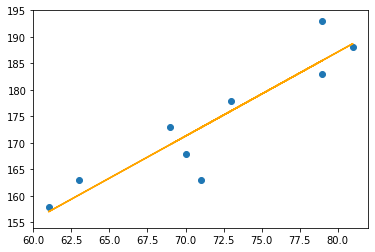

In [25]:
fig, ax = plt.subplots()

reta_2d = [60.29494382 + 1.58567416*x for x in pesos]

ax.scatter(x=pesos, y=alturas)
ax.plot(pesos, reta_2d, c='orange')
ax.set_ylim(bottom=154, top=195)

In [26]:
sum([(phi - y)**2 for phi, y in zip(reta_2d, alturas)])

194.31882022471902

#### e) resolva o item (c) com esta nova função e compare os resultados.

Peso de uma pessoa com 175 cm de altura:

$$
175 = 60.29494382 + 1.58567416x \\
x = \frac{175 - 60.29494382}{1.58567416}
$$

In [27]:
(175 - 60.29494382)/1.58567416

72.33835240147951

Aproximadamente 72.34 kg segundo o modelo.

Altura de uma pessoa com 80 kg:

In [28]:
(lambda x: 60.29494382 + 1.58567416*x)(80)

187.14887662

Aproximadamente 187.15 cm segundo o modelo.

Comparação

Ocorrem pequenas divergências entre os dois modelos.

Alturas: 189.7 vs 187.15 \
Pesos: 72.25 vs 72.34

In [29]:
media_pesos = sum(pesos)/len(pesos)
soma_quadrados_pesos = sum([(media_pesos - y)**2 for y in pesos])
soma_quadrados_reta_2b = sum([(phi - y)**2 for phi, y in zip(reta_2b, pesos)])

1 - soma_quadrados_reta_2b / soma_quadrados_pesos

0.8365542633623775

In [30]:
media_alturas = sum(alturas)/len(alturas)
soma_quadrados_alturas = sum([(media_alturas - y)**2 for y in alturas])
soma_quadrados_reta_2d = sum([(phi - y)**2 for phi, y in zip(reta_2d, alturas)])

1 - soma_quadrados_reta_2d / soma_quadrados_alturas

0.8365542633623858

As duas retas tem $R^2 = 0.84$ aproximadamente, o que indica que elas têm a mesma precisão.

---

### 4) O número de bactérias por unidade de volume, existente em uma cultura após x horas é apresentado na tabela:

In [33]:
horas =     [0.0, 1, 2, 3, 4, 5, 6]
bacterias = [32, 47, 65, 92, 132, 190, 275]

#### a) verifique que uma curva para se ajustar ao diagrama de dispersão é do tipo exponencial.

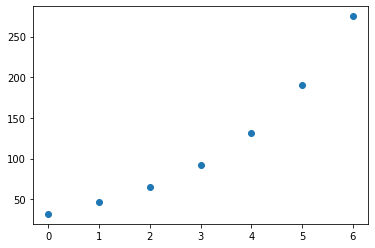

In [34]:
fig, ax = plt.subplots()

ax.scatter(x=horas, y=bacterias)

#### b) ajuste aos dados as curvas $y \approx ae^{bx}$ e $y \approx ax^b$. Escolha uma das curvas para representar os dados e justifique.

##### $y = ae^{bx}$

Linearizando
$$
z = \ln(y) = \ln(ae^{bx}) \\
z = \ln(a) + bx \\
t = \ln(a) \\
z = t + bx
$$

In [35]:
from math import log
equacoes_normais(lista_x=horas, lista_y=[log(y) for y in bacterias], grau=1)

Matrix([
[  3.4703145086034],
[0.355545470649718]])

$$
t = 3.470315 \\
b = 0.355545
$$

Voltando para as variáveis iniciais
$$
\ln(a) = t \\
\ln(a) = 3.470315 \\
e^{\ln(a)} = e^{3.470315} \\
a = e^{3.470315}
$$

In [36]:
from math import exp
exp(3.470315)

32.1468671131748

$$
a = 32.146867 \\
y(x) = 32.146867 \cdot e^{0.355545x}
$$

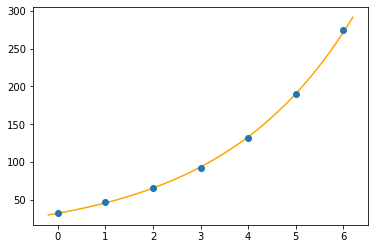

In [37]:
fig, ax = plt.subplots()

exponencial = [32.146867 * exp(0.355545*x) for x in horas]
exponencial_curva = [32.146867 * exp(0.355545*x) for x in np.linspace(-0.2, 6.2, 100)]

ax.scatter(x=horas, y=bacterias, zorder=2)
ax.plot(np.linspace(-0.2, 6.2, 100), exponencial_curva, c='orange', zorder=1)

In [38]:
[(phi - y)**2 for phi, y in zip(exponencial, bacterias)]

[0.021569915689000088,
 1.27185757854848,
 0.2095410631586153,
 1.9753689338512268,
 1.653042267002652,
 0.03729676486337812,
 12.977105566095988]